In [5]:
import pandas as pd
file_path = r'C:\Users\fahee\Project 1\Project 1.csv'
data = pd.read_csv(file_path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
file_path = r'C:\Users\fahee\Project 1\Project 1.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Daily Return'] = data['Close'].pct_change()
data = data.dropna()
features = ['Open', 'High', 'Low', 'Volume', 'MA10', 'MA50', 'Daily Return']
target = 'Close'
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 15.611862582915762
R-squared: 0.9986562684463254


In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'fit_intercept': False, 'positive': False}
Best Score: 0.9990962917043467


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
file_path = r'C:\Users\fahee\Project 1\Project 1.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Daily Return'] = data['Close'].pct_change()
data = data.dropna()
features = ['Open', 'High', 'Low', 'Volume', 'MA10', 'MA50', 'Daily Return']
target = 'Close'
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Parameters: {'fit_intercept': False, 'positive': False}
Best Score: 0.9990962917043467
Mean Squared Error: 15.277579809212725
R-squared: 0.9986850405616633


In [8]:
import pandas as pd
file_path = r'C:\Users\fahee\Project 1\Project 1.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Daily Return'] = data['Close'].pct_change()
data = data.dropna()
print(data.head())

         Date        Open        High         Low       Close   Adj Close  \
49 2018-04-17  329.660004  338.619995  323.769989  336.059998  336.059998   
50 2018-04-18  336.299988  338.820007  331.100006  334.519989  334.519989   
51 2018-04-19  332.880005  335.309998  326.769989  332.700012  332.700012   
52 2018-04-20  332.220001  336.510010  326.000000  327.769989  327.769989   
53 2018-04-23  329.149994  331.220001  317.079987  318.690002  318.690002   

      Volume        MA10        MA50  Daily Return  
49  33866500  302.817001  295.477001      0.091884  
50  11221100  307.375000  297.082201     -0.004583  
51   8438800  311.248001  298.421801     -0.005441  
52   9158700  315.139999  299.686001     -0.014818  
53   8968000  318.016000  301.057801     -0.027702  


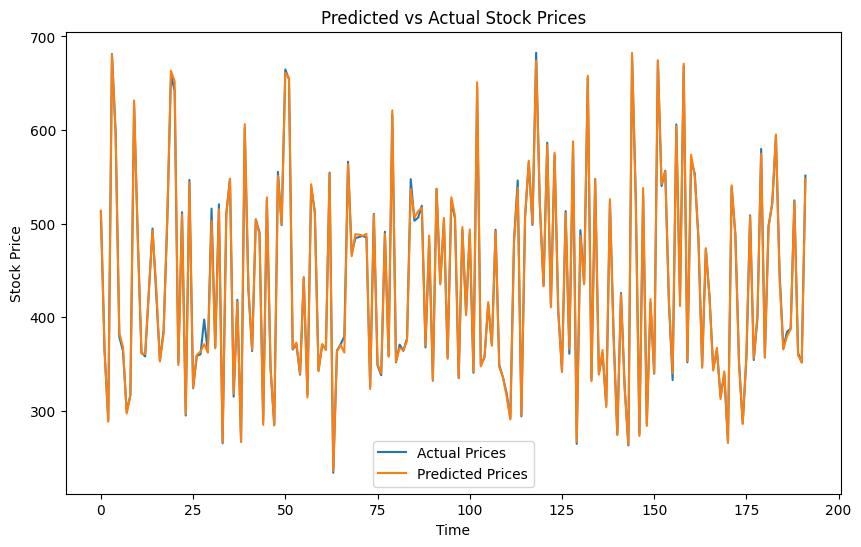

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Predicted vs Actual Stock Prices')
plt.show()

Best Parameters: {'fit_intercept': False, 'positive': False}
Best Score: 0.9990962917043467
Mean Squared Error: 15.277579809212725
R-squared: 0.9986850405616633
Cross-validated R-squared scores: [0.99504034 0.99581952 0.99726603 0.98087619 0.99698106]
Average R-squared score: 0.9931966287204709


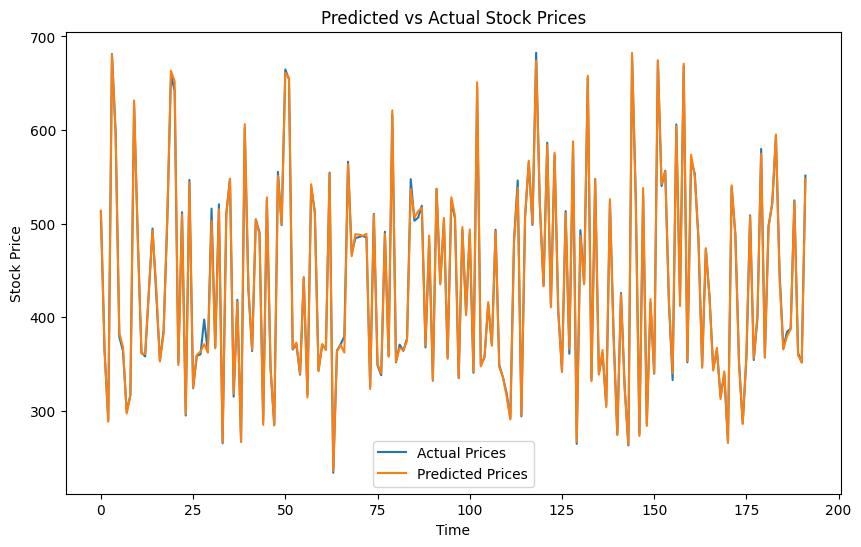

['linear_regression_model.pkl']

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
file_path = r'C:\Users\fahee\Project 1\Project 1.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()
data['Daily Return'] = data['Close'].pct_change()
data = data.dropna()
features = ['Open', 'High', 'Low', 'Volume', 'MA10', 'MA50', 'Daily Return']
target = 'Close'
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print("Cross-validated R-squared scores:", cv_scores)
print("Average R-squared score:", cv_scores.mean())
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Predicted vs Actual Stock Prices')
plt.show()
joblib.dump(best_model, 'linear_regression_model.pkl')